# Домашнее задание

## Задача

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных
студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных.
Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование
данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения
моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть
изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать
выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать
не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится
обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров.
Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять
функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей
с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.метрик.

## Решение

In [0]:
!pip install gmdhpy
!pip install heamy
from google.colab import files

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle
from gmdhpy import gmdh
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
%matplotlib inline 
sns.set(style="ticks")

### 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных  построение модели машинного обучения для решения или задачи регрессии.

Датасет - COVID-19 Russia regions cases. COVID-19 virus (coronavirus) has been starting to spread inside of Russia. This is important to investigate and understand the spreading from a very low level. The world-level data is representing Russia virus cases as a single point. But Russia is a very huge and heterogeneous country. For better analyze we have to consider Russia infection cases distributed by region. So this is a dataset of regions distributed COVID-19 virus inside of Russia.

In [75]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covid19-russia-cases.csv to covid19-russia-cases.csv
User uploaded file "covid19-russia-cases.csv" with length 281785 bytes


In [77]:
data = pd.read_csv('covid19-russia-cases.csv', sep=';')
data.head()

,Date,Region/City-Eng,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered
0,26.01.2020,Diamond Princess,NaN,3.0,0.0,0.0,3.0,0.0,0.0
1,31.01.2020,Tyumen region,72.0,1.0,0.0,0.0,1.0,0.0,0.0
2,31.01.2020,Zabaykalsky Krai,75.0,1.0,0.0,0.0,1.0,0.0,0.0
3,12.02.2020,Tyumen region,72.0,0.0,0.0,1.0,1.0,0.0,1.0
4,12.02.2020,Zabaykalsky Krai,75.0,0.0,0.0,1.0,1.0,0.0,1.0


In [78]:
data.shape

(4499, 9)

In [79]:
data.isnull().sum() 

Date               0
Region/City-Eng    0
Region_ID          2
Day-Confirmed      0
Day-Deaths         0
Day-Recovered      0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Уберем столбец с названиями и преобразуем дату в соответствующий временной формат:

In [0]:
data["Date"] = pd.to_datetime(data["Date"]).astype(np.int64)/1000000 

data = data.drop(["Region/City-Eng"], axis=1)

data["Region_ID"] =data["Region_ID"].fillna(method='ffill')

data=data.dropna()

In [81]:
data.isnull().sum()

Date             0
Region_ID        0
Day-Confirmed    0
Day-Deaths       0
Day-Recovered    0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

Теперь нет пропусков

In [82]:
data.head()

,Date,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered
1,1.580429e+12,72.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.580429e+12,75.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.606867e+12,72.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.606867e+12,75.0,0.0,0.0,1.0,1.0,0.0,1.0
5,1.583107e+12,50.0,1.0,0.0,0.0,1.0,0.0,0.0


In [83]:
data.describe()

,Date,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered
count,4.498000e+03,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000
mean,1.590025e+12,44.236105,80.616052,0.848155,29.179191,1654.563139,15.745220,352.179858
std,6.111935e+09,25.034676,393.074041,5.128834,214.880010,9997.870475,108.936064,2274.627093
min,1.578096e+12,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.587082e+12,23.000000,5.000000,0.000000,0.000000,57.000000,0.000000,7.000000
50%,1.588637e+12,44.000000,23.000000,0.000000,3.000000,309.500000,3.000000,46.000000
75%,1.590365e+12,65.000000,54.000000,0.000000,18.000000,966.000000,8.000000,243.000000
max,1.607126e+12,95.000000,6703.000000,77.000000,8033.000000,169303.000000,2110.000000,61619.000000


In [84]:
for col in data.columns:
  print(col+": "+str(len(data[col].unique())))

Date: 85
Region_ID: 85
Day-Confirmed: 323
Day-Deaths: 51
Day-Recovered: 221
Confirmed: 1724
Deaths: 140
Recovered: 903


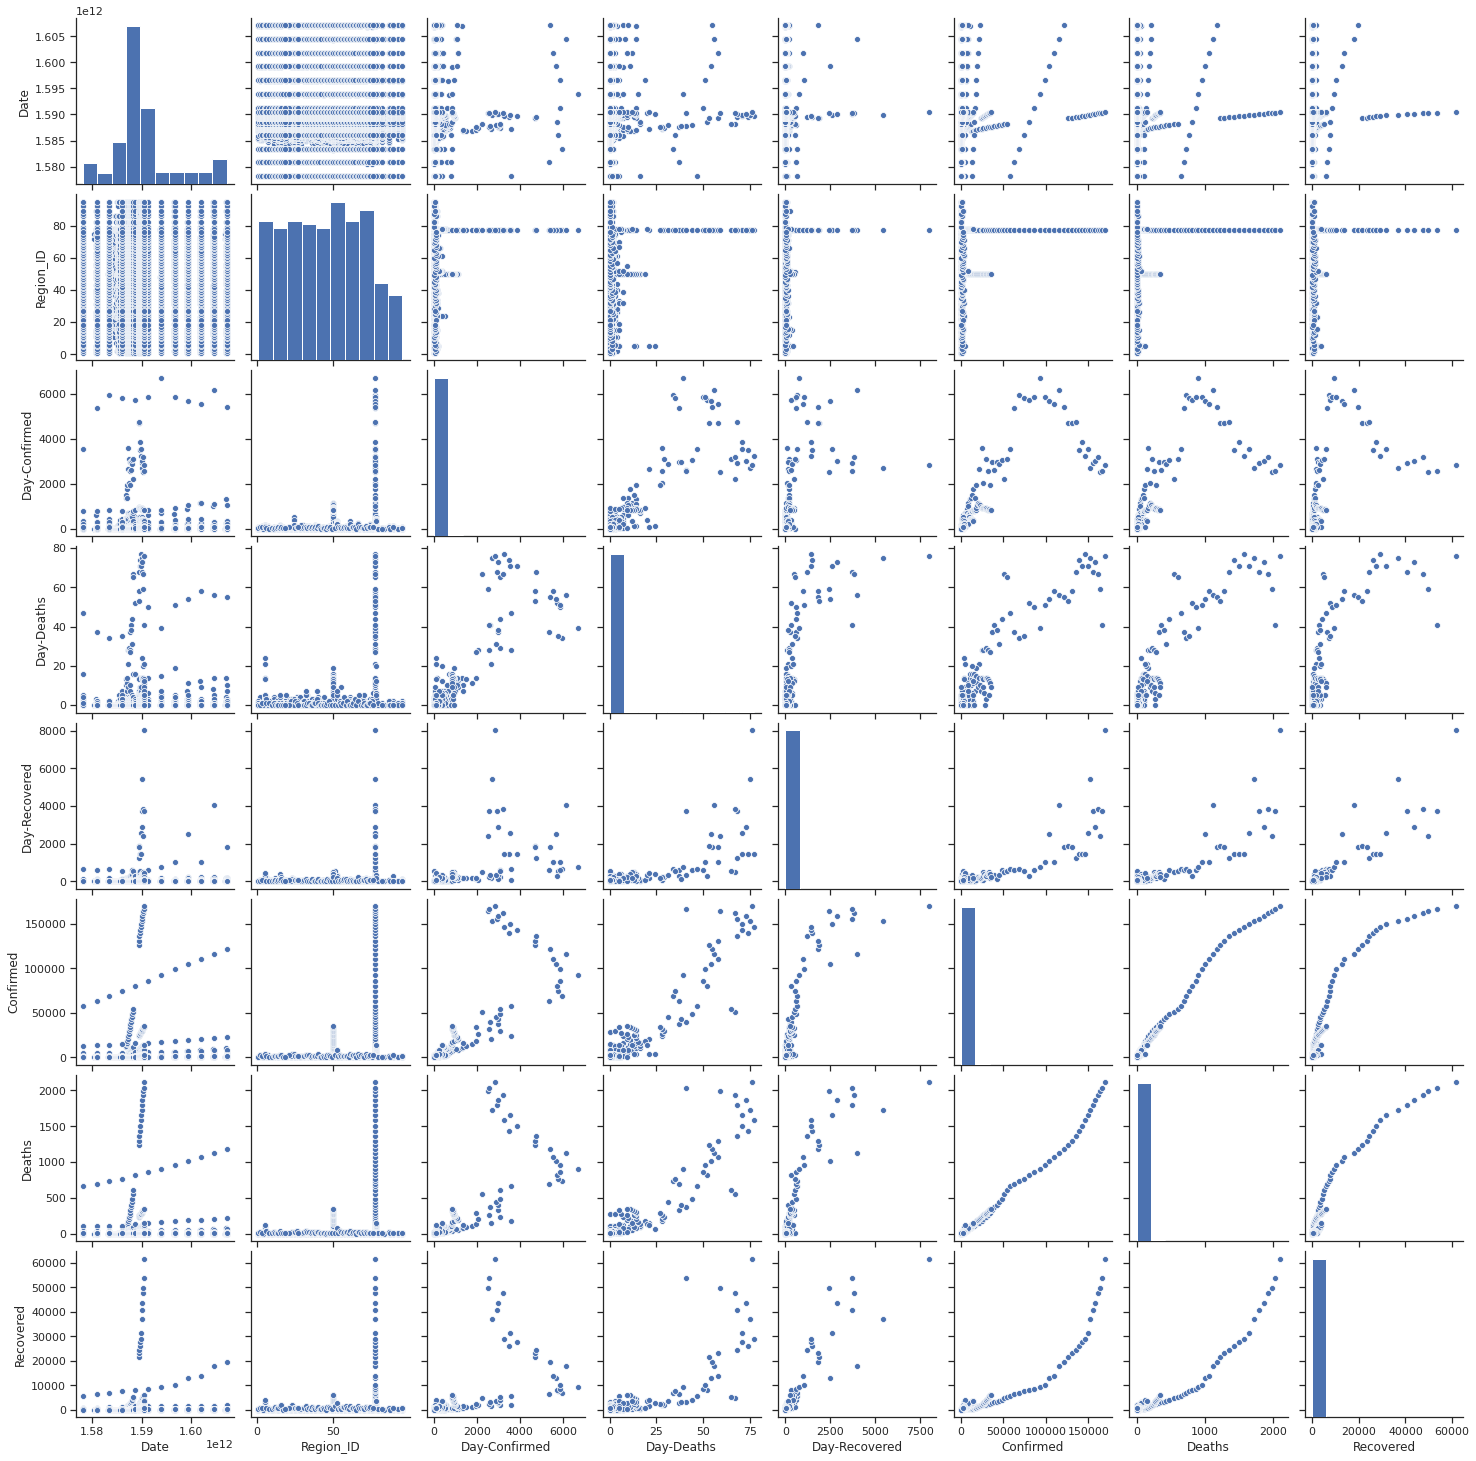

In [85]:
sns.pairplot(data)

Сильная корреляция присутствует между количеством подтвержденных случаев, смертей и выздоровлений, что довольно очевидно

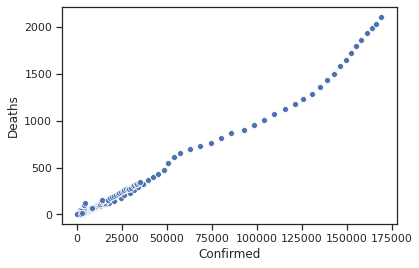

In [86]:
sns.scatterplot(x='Confirmed', y='Deaths', data=data)

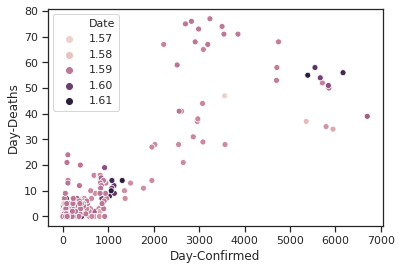

In [87]:
sns.scatterplot(x='Day-Confirmed', y='Day-Deaths', data=data, hue='Date')

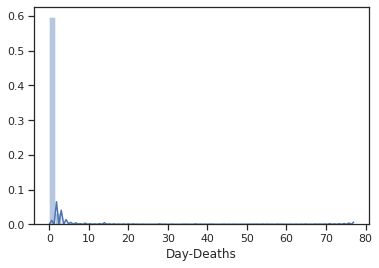

In [88]:
sns.distplot(data['Day-Deaths'])

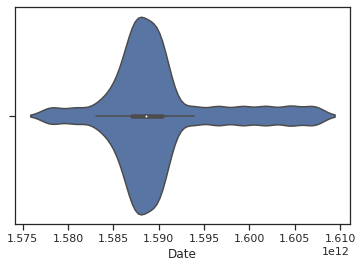

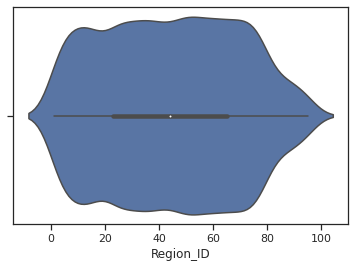

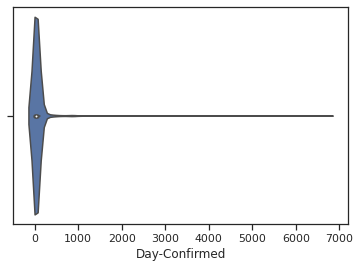

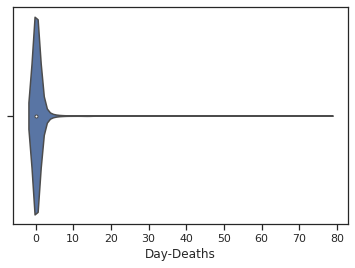

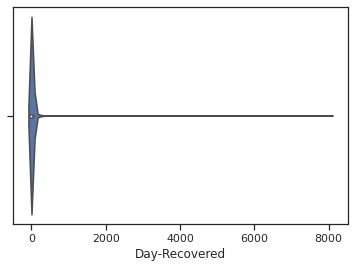

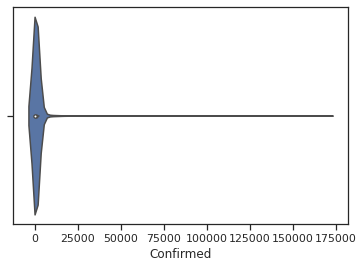

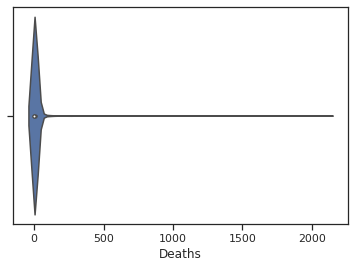

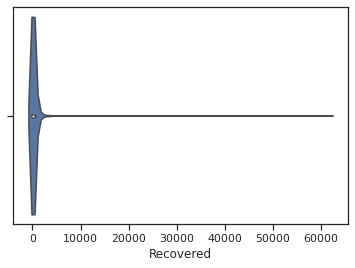

In [89]:
for col in data.columns:
    sns.violinplot(x=data[col])
    plt.show()

### 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

#### Все данные - числовые

In [90]:
data.dtypes 

Date             float64
Region_ID        float64
Day-Confirmed    float64
Day-Deaths       float64
Day-Recovered    float64
Confirmed        float64
Deaths           float64
Recovered        float64
dtype: object

#### Масштабирование данных. 

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)

Добавим масштабированные данные в набор данных


In [0]:
for i in range(len(data.columns)):
    col = data.columns[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [93]:
data.head()

,Date,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered,Date_scaled,Region_ID_scaled,Day-Confirmed_scaled,Day-Deaths_scaled,Day-Recovered_scaled,Confirmed_scaled,Deaths_scaled,Recovered_scaled
1,1.580429e+12,72.0,1.0,0.0,0.0,1.0,0.0,0.0,0.080357,0.755319,0.000149,0.0,0.000000,0.0,0.0,0.000000
2,1.580429e+12,75.0,1.0,0.0,0.0,1.0,0.0,0.0,0.080357,0.787234,0.000149,0.0,0.000000,0.0,0.0,0.000000
3,1.606867e+12,72.0,0.0,0.0,1.0,1.0,0.0,1.0,0.991071,0.755319,0.000000,0.0,0.000124,0.0,0.0,0.000016
4,1.606867e+12,75.0,0.0,0.0,1.0,1.0,0.0,1.0,0.991071,0.787234,0.000000,0.0,0.000124,0.0,0.0,0.000016
5,1.583107e+12,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.172619,0.521277,0.000149,0.0,0.000000,0.0,0.0,0.000000


Проверим, что масштабирование не повлияло на распределение данных

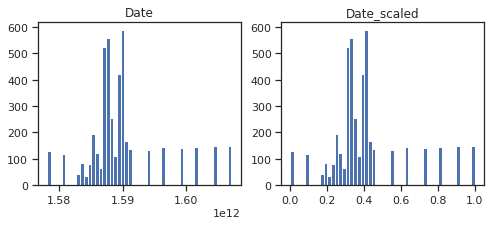

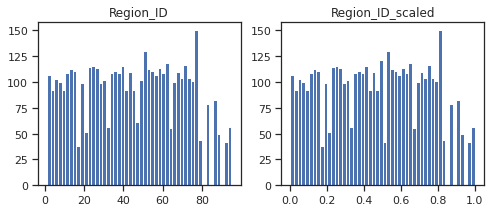

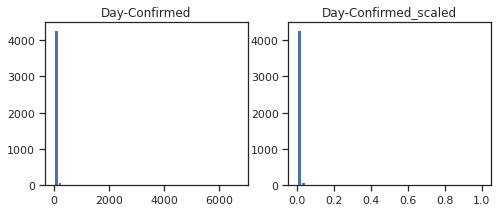

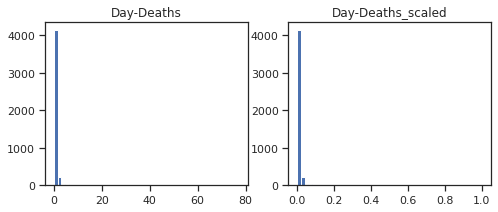

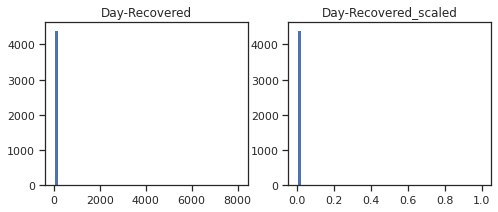

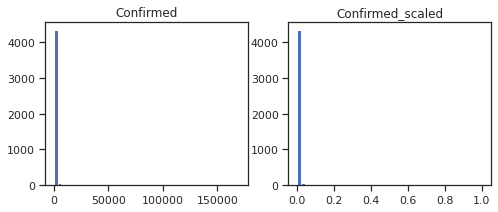

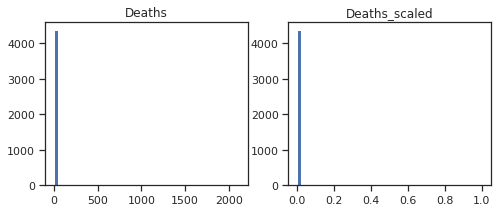

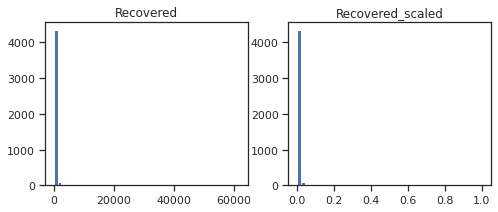

In [94]:
for col in data.columns[0:int(len(data.columns)/2)]:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

Воспользуемся наличием тестовых выборок, включив их в корреляционную матрицу

In [95]:
corr_cols_1 = data.columns[0:int(len(data.columns)/2)]
corr_cols_1

Index(['Date', 'Region_ID', 'Day-Confirmed', 'Day-Deaths', 'Day-Recovered',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [96]:
corr_cols_2 = data.columns[int(len(data.columns)/2):len(data.columns)]
corr_cols_2

Index(['Date_scaled', 'Region_ID_scaled', 'Day-Confirmed_scaled',
       'Day-Deaths_scaled', 'Day-Recovered_scaled', 'Confirmed_scaled',
       'Deaths_scaled', 'Recovered_scaled'],
      dtype='object')

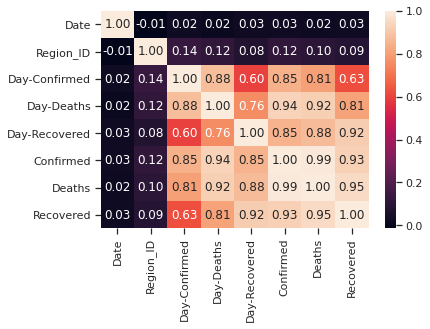

In [97]:
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

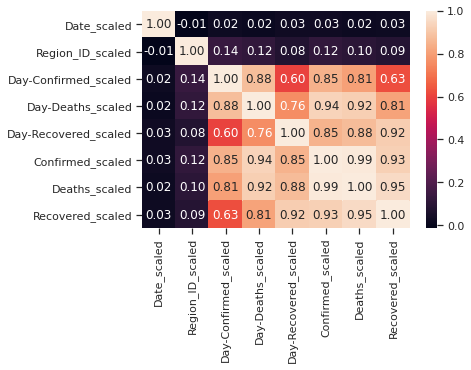

In [98]:
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

Количество подтвержденных заражений коррелирует с количеством смертей и количеством выздоровлений.

### 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.

Возьмем метрики MAE, Median Absolute Error и  R².
- MAE (Mean Absolute Error) — это среднее модуля ошибки. Данная метрика удобна, она не чувствительна к выбросам,  как MSE, показывает среднюю ошибку
- Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, менее чувствительна к воздействию промахов
- Коэффициент детерминации показывает, насколько модель соответствует или не соответствует данным.

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

### 6. Выбор наиболее подходящих моделей для решения задачи  регрессии.

- Возьмем модели случайный лес и дерево решений, поскольку они показали оптимальные результаты.
- В качестве ансамблевой модели возьмем 'TREE+RF=>LR' модель

### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [100]:
data_new = shuffle(data)
data_new

,Date,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered,Date_scaled,Region_ID_scaled,Day-Confirmed_scaled,Day-Deaths_scaled,Day-Recovered_scaled,Confirmed_scaled,Deaths_scaled,Recovered_scaled
830,1.604448e+12,57.0,5.0,0.0,0.0,29.0,0.0,3.0,0.907738,0.595745,0.000746,0.0,0.000000,0.000165,0.000000,0.000049
2369,1.578182e+12,3.0,28.0,0.0,6.0,325.0,4.0,94.0,0.002976,0.021277,0.004177,0.0,0.000747,0.001914,0.001896,0.001526
3214,1.604534e+12,62.0,96.0,0.0,9.0,1744.0,5.0,224.0,0.910714,0.648936,0.014322,0.0,0.001120,0.010295,0.002370,0.003635
2677,1.588637e+12,44.0,12.0,0.0,4.0,278.0,3.0,64.0,0.363095,0.457447,0.001790,0.0,0.000498,0.001636,0.001422,0.001039
1044,1.586822e+12,18.0,14.0,0.0,0.0,27.0,0.0,3.0,0.300595,0.180851,0.002089,0.0,0.000000,0.000154,0.000000,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,1.589933e+12,1.0,64.0,0.0,14.0,525.0,8.0,263.0,0.407738,0.000000,0.009548,0.0,0.001743,0.003095,0.003791,0.004268
3546,1.589501e+12,16.0,84.0,0.0,116.0,2064.0,6.0,1006.0,0.392857,0.159574,0.012532,0.0,0.014440,0.012185,0.002844,0.016326
2556,1.583366e+12,66.0,75.0,0.0,0.0,1091.0,1.0,150.0,0.181548,0.691489,0.011189,0.0,0.000000,0.006438,0.000474,0.002434
167,1.585181e+12,86.0,2.0,0.0,0.0,4.0,0.0,0.0,0.244048,0.904255,0.000298,0.0,0.000000,0.000018,0.000000,0.000000


На основе масштабированных данных выделим обучающую и тестовую выборки

In [101]:
train_data_all = data_new[:int(len(data_new)/1.39)]
test_data_all = data_new[int(len(data_new)/1.39):]
train_data_all.shape, test_data_all.shape

((3235, 16), (1263, 16))

Признаки для задачи регресии (опустим название)

In [0]:
task_regr_cols = data.columns

Выборки для задачи регресии

In [103]:
regr_X_train = train_data_all[task_regr_cols]
regr_X_test = test_data_all[task_regr_cols]
regr_Y_train = train_data_all['Recovered']
regr_Y_test = test_data_all['Recovered']
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((3235, 16), (1263, 16), (3235,), (1263,))

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

Модели

In [0]:
regr_models = {'Tree':DecisionTreeRegressor(max_depth=8),
               'RF':RandomForestRegressor(max_depth=10, n_estimators=30),
              }

Сохранение метрик

In [0]:
regrMetricLogger = MetricLogger()

In [0]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    medae = median_absolute_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MedAE={}, R2={}'.format(
        round(mae, 3), round(medae, 3), round(r2, 3)))
    print('*****************************************************')

In [107]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=19.502, MedAE=2.429, R2=0.988
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None

#### Ансамблевая модель

Набор данных

In [0]:
dataset = Dataset(regr_X_train, regr_Y_train, regr_X_test)

Возьмем лучшую модель: 'TREE+RF=>LR' модели первого уровня

In [0]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':5},name='rf')

Первый уровень - две модели: дерево и случайный лес

Второй уровень: линейная регрессия 

In [0]:
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)

Модель второго уровня

In [111]:
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

results = stacker.validate(k=10,scorer=median_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [118.96637349755959, 12.513431999697563, 18.10626079918384, 36.451111639961134, 49.078643044273676, 15.813108285525228, 13.352649802269402, 52.33870186751844, 80.9529795684401, 12.544411923817126]
Mean accuracy: 41.011767242824604
Standard Deviation: 33.81360885479594
Variance: 1143.3601437851344
Metric: median_absolute_error
Folds accuracy: [10.655430568402888, 7.653840975335868, 8.251446668198765, 8.969914107659534, 8.747102779386772, 6.827112351061075, 6.209973445464691, 5.944488317584806, 14.556112682390998, 7.7854194988594685]
Mean accuracy: 8.560084139434487
Standard Deviation: 2.396454956448276
Variance: 5.742996358285508


### 9. Подбор гиперпараметров для выбранных моделей. 

#### Случайный лес

In [112]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
n_range = np.array(range(1,52,5))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])}]

In [114]:
%%time
rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 1min 19s, sys: 94.5 ms, total: 1min 19s
Wall time: 1min 19s


Лучшая модель

In [115]:
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Лучшее значение параметров

In [116]:
rf_gs.best_params_

{'max_depth': 6}

Изменение качества на тестовой выборке в зависимости от К-соседей

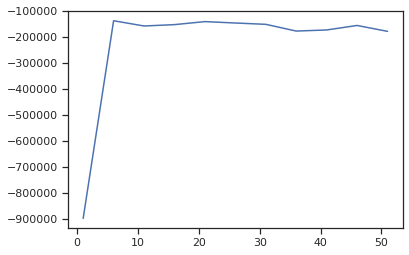

In [117]:
plt.plot(n_range, rf_gs.cv_results_['mean_test_score'])

#### Дерево

In [118]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [119]:
n_range = np.array(range(1,52,5))

tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])}]

In [120]:
%%time
dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
dt_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 1.35 s, sys: 5.02 ms, total: 1.35 s
Wall time: 1.36 s


Лучшая модель

In [121]:
dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Лучшее значение параметров

In [122]:
dt_gs.best_params_

{'max_depth': 6}

Изменение качества на тестовой выборке 

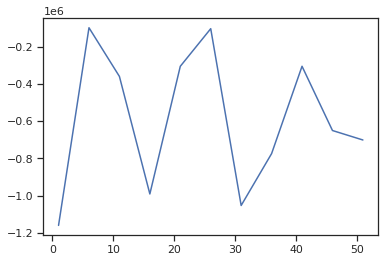

In [123]:
plt.plot(n_range, dt_gs.cv_results_['mean_test_score'])

#### Ансамблевая модель

#### Decision tree

In [124]:
n_range = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]
tuned_parameters = [{'min_impurity_split': n_range}]
tuned_parameters

[{'min_impurity_split': [0.5, 1, 1.5, 2, 2.5, 3, 3.5]}]

In [125]:
%%time
np.warnings.filterwarnings('ignore')
ens_dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_dt_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 885 ms, sys: 5 µs, total: 885 ms
Wall time: 891 ms


Лучшая модель

In [126]:
ens_dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=1,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Лучшее значение параметров

In [127]:
ens_dt_gs.best_params_

{'min_impurity_split': 1}

Изменение качества на тестовой выборке 

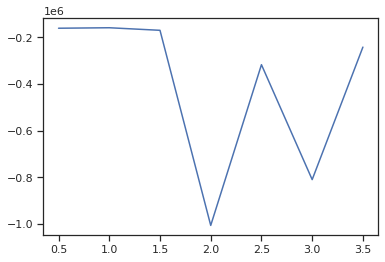

In [128]:
plt.plot(n_range, ens_dt_gs.cv_results_['mean_test_score'])

##### Random Forest

In [129]:
n_range = [1, 5, 10, 20, 30, 40 ,50 ,60]
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}]

In [130]:
%%time
ens_rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 18 s, sys: 21.8 ms, total: 18 s
Wall time: 18.1 s


Лучшая модель

In [131]:
ens_rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Лучшее значение параметров

In [132]:
ens_rf_gs.best_params_

{'n_estimators': 20}

Изменение качества на тестовой выборке 

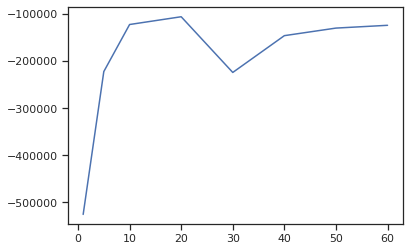

In [133]:
plt.plot(n_range, ens_rf_gs.cv_results_['mean_test_score'])

### 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [0]:
regr_models_grid = {'Tree':dt_gs.best_estimator_,
                   'RF': rf_gs.best_estimator_
                   }

In [135]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=29.022, MedAE=9.805, R2=0.993
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None

#### Ансамблевый метод

Возьмем лучшую модель: 'TREE+RF=>LR'

In [0]:
model_tree = Regressor(dataset=dataset,
                       estimator=DecisionTreeRegressor,
                       parameters={'min_impurity_split':0.5,
                                  'max_depth':20},name='tree')
model_lr = Regressor(dataset=dataset,
                     estimator=LinearRegression,
                     name='lr')
model_rf = Regressor(dataset=dataset,
                     estimator=RandomForestRegressor,
                     parameters={'n_estimators': 60,
                                'max_depth': 40},name='rf')

pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)

модель второго уровня

In [0]:
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)

In [138]:
results = stacker.validate(k=10,scorer=mean_absolute_error)

results = stacker.validate(k=10,scorer=median_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [61.41217930446463, 10.148726428351306, 13.495581444504452, 34.37390274668207, 40.84891137858217, 13.430652834526612, 13.618686119295818, 80.78067126550678, 46.20929309073781, 9.430045589632195]
Mean accuracy: 32.37486502022838
Standard Deviation: 23.53944659224517
Variance: 554.1055458691628
Metric: median_absolute_error
Folds accuracy: [12.819266461300845, 10.422650303153727, 10.548233396175, 11.77881019591482, 10.874819926885127, 10.845088618431564, 10.963503564838316, 10.470361306973068, 2.30882043617202, 10.240841344973418]
Mean accuracy: 10.127239555481792
Standard Deviation: 2.7068622864134957
Variance: 7.327103437607697


Удалось добиться изменений.

### 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

Метрики качества модели

In [139]:
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MedAE', 'R2'], dtype=object)

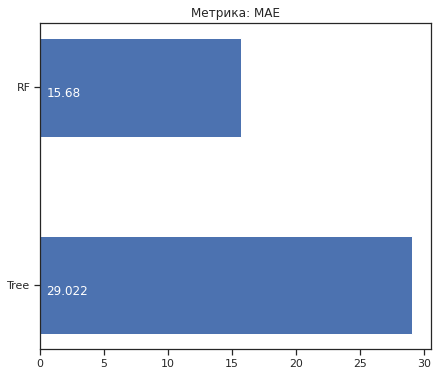

In [140]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', 
                      ascending=False, figsize=(7, 6))

Ансамбль: 32.4

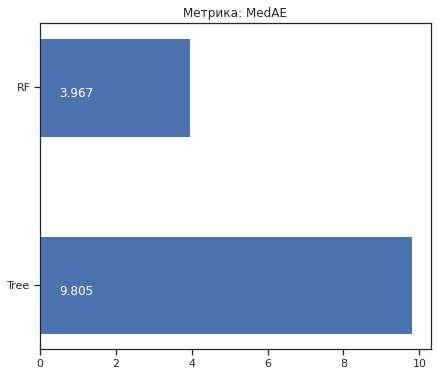

In [141]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', 
                      ascending=False, figsize=(7, 6))

Ансамбль: 10.1

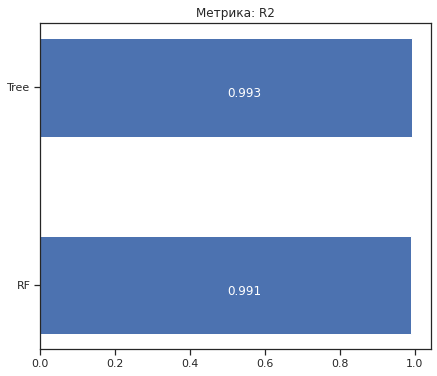

In [142]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))

# Вывод

Исходя из размера ошибки модели, лучшие результаты показала модель случайного леса.